In [4]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# read the pickle file
with open('../tracker_stubs/ball_detection.pkl', 'rb') as f:
    ball_positions = pickle.load(f)

In [6]:
ball_positions = [x.get(1,[]) for x in ball_positions]
# convert the list into pandas dataframe
df_ball_positions = pd.DataFrame(ball_positions, columns=['x1', 'y1', 'x2', 'y2'])
# interpolate the missing values
df_ball_positions = df_ball_positions.interpolate()
df_ball_positions = df_ball_positions.bfill()

In [10]:
df_ball_positions['mid_y'] = (df_ball_positions['y1'] + df_ball_positions['y2']) / 2
df_ball_positions['mid_y_rolling_mean'] = df_ball_positions['mid_y'].rolling(window=5, min_periods=1, center=False).mean()

In [11]:
df_ball_positions

,x1,y1,x2,y2,mid_y,mid_y_rolling_mean
0,677.967651,327.735596,689.725708,340.544495,334.140045,334.140045
1,677.803101,318.998474,687.717285,330.471741,324.735107,329.437576
2,676.114258,310.030090,685.510010,321.388733,315.709412,324.861521
3,674.716492,302.180634,685.443176,313.491608,307.836121,320.605171
4,672.790405,293.403198,684.222656,306.151733,299.777466,316.439630
...,...,...,...,...,...,...
655,185.203201,501.190918,201.087448,516.939941,509.065430,487.866513
656,181.158417,513.020447,195.285553,529.070862,521.045654,498.245575
657,178.096863,526.430481,191.306091,539.887512,533.158997,509.379077
658,174.337662,539.622131,187.112228,552.700989,546.161560,521.222168


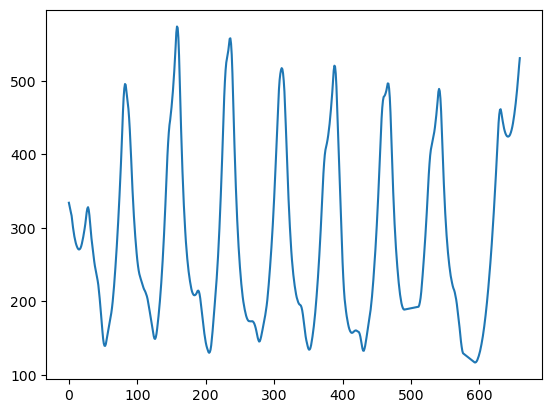

In [12]:
# plot mid_y_rolling_mean
plt.plot(df_ball_positions['mid_y_rolling_mean'])

In [14]:
df_ball_positions['delta_y'] = df_ball_positions['mid_y_rolling_mean'].diff()

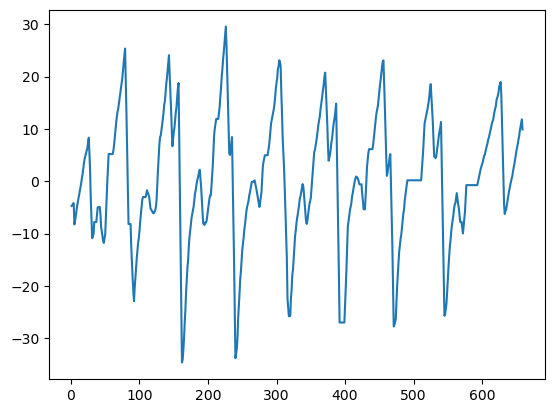

In [15]:
plt.plot(df_ball_positions['delta_y'])

In [16]:
df_ball_positions['ball_hit'] = 0

In [17]:
minimum_change_frames_for_hit = 25
for i in range(1, len(df_ball_positions) - int(minimum_change_frames_for_hit*1.2)):
    negative_position_change = df_ball_positions['delta_y'].iloc[i] > 0 and df_ball_positions['delta_y'].iloc[i+1] < 0
    positive_position_change = df_ball_positions['delta_y'].iloc[i] < 0 and df_ball_positions['delta_y'].iloc[i+1] > 0
    if negative_position_change or positive_position_change:
        change_count = 0
        for change_frame in range(i+1, i+int(minimum_change_frames_for_hit*1.2)):
            negative_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] > 0 and df_ball_positions['delta_y'].iloc[i+1] < 0
            positive_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] < 0 and df_ball_positions['delta_y'].iloc[i+1] > 0

            if negative_position_change and negative_position_change_following_frame:
                change_count += 1
            elif positive_position_change and positive_position_change_following_frame:
                change_count += 1
        
        if change_count >= minimum_change_frames_for_hit:
            df_ball_positions['ball_hit'].iloc[i] = 1

frame_nums_with_ball_hit = df_ball_positions[df_ball_positions['ball_hit'] == 1].index.tolist()


C:\Users\marin\AppData\Local\Temp\ipykernel_7388\2060759883.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ball_positions['ball_hit'].iloc[i] = 1
C:\Users\marin\AppData\Local\Temp\ipykernel_7388\2060759883.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ball_positions['ball_hit'].iloc[i] = 1
C:\Users\marin\AppData\Local\Temp\ipykernel_7388\2060759883.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ball_position

In [19]:
df_ball_positions[df_ball_positions['ball_hit'] == 1]

,x1,y1,x2,y2,mid_y,mid_y_rolling_mean,delta_y,ball_hit
15,658.202515,266.330780,667.915649,276.457062,271.393921,270.465808,-0.315356,1
28,638.392273,314.046570,650.384338,326.496887,320.271729,328.123596,1.706531,1
53,579.662026,140.760481,592.787170,153.031519,146.896000,139.198079,-0.222097,1
82,510.741829,479.829384,523.828476,493.314659,486.572021,495.886943,5.847331,1
126,695.376733,148.917792,705.915308,159.370477,154.144135,148.675992,-0.487366,1
158,841.739548,563.152283,855.148239,577.063080,570.107681,574.245016,8.314871,1
183,550.760803,202.616837,562.710144,214.372940,208.494888,208.215340,-0.800235,1
189,522.860443,206.643066,533.490021,217.960175,212.301620,214.544278,0.592685,1
205,485.849915,126.384277,495.240051,136.065186,131.224731,129.761633,-0.997491,1
236,543.425659,536.360799,557.516439,551.909749,544.135274,558.142788,0.599032,1
